# CSAP Code Notebook 02

Exploratory Data Analyses

Tristan Muno [](https://orcid.org/0009-0002-3078-8436) (University of Mannheim)  
Thomas König [](https://orcid.org/0000-0002-1797-6662) (University of Mannheim)  
January 9, 2026

# Setup

In [ ]:

# To track render duration
start_time <- Sys.time()

# set width of console output
options(width = 80)


# Install and load required packages
p_required <- c(
  "tidyverse",
  "here",
  "janitor",
  "dagitty",
  "ggdag",
  "ggpubr",
  "gtsummary",
  "gt",
  "sessioninfo"
)
packages <- rownames(installed.packages())
p_to_install <- p_required[!(p_required %in% packages)]
if (length(p_to_install) > 0) {
  install.packages(p_to_install)
}
sapply(p_required, require, character.only = TRUE)


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: here

here() starts at C:/R/research/CSAP

Loading required package: janitor


Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test


Loading required package: dagitty

Loading required package: ggdag


Attaching package: 'ggdag'

The following object is masked from 'package:stats':

    filter

Loading required package: ggpubr
Loading required package: gtsummary
Loading required package: gt
Loading required package: sessioninfo

  tidyverse        here     janitor     dagitty       ggdag      ggpubr 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
  gtsummary          gt sessioninfo 
       TRUE        TRUE        TRUE 

In [ ]:

load(
  here(
    "data",
    "02_processed",
    "eu25games2019.RData"
  )
)


# Table respondents by country

In [ ]:

eu25games2019 |>
  distinct(meta_pid, .keep_all = T) |>
  tabyl(
    meta_country
  ) |>
  adorn_rounding(2) |>
  adorn_totals() |>
  knitr::kable(col.names = c("Country", "N", "Percent"))


  Country                N   Percent
  ---------------- ------- ---------
  Austria             1277      0.04
  Belgium             1305      0.04
  Bulgaria             982      0.03
  Croatia             1240      0.04
  Czech Republic      1135      0.04
  Denmark             1200      0.04
  Estonia              944      0.03
  Finland             1160      0.04
  France              1156      0.04
  Germany             1188      0.04
  Greece              1161      0.04
  Hungary              986      0.03
  Ireland             1061      0.04
  Italy               1172      0.04
  Latvia              1148      0.04
  Lithuania           1265      0.04
  Netherlands         1221      0.04
  Poland              1198      0.04
  Portugal            1187      0.04
  Romania             1480      0.05
  Slovakia            1297      0.04
  Slovenia            1135      0.04
  Spain               1396      0.05
  Sweden              1254      0.04
  United Kingdom      1279      0.04
  Total              29827      0.99


# Table respondents by country and gender

In [ ]:

eu25games2019 |>
  distinct(meta_pid, .keep_all = T) |>
  tabyl(
    meta_country,
    q_gender
  ) |>
  adorn_totals() |>
  knitr::kable(
    col.names = c("Country", "Male", "Female", "Other")
  )


  Country             Male   Female   Other
  ---------------- ------- -------- -------
  Austria              645      630       2
  Belgium              729      574       2
  Bulgaria             463      518       1
  Croatia              545      694       1
  Czech Republic       515      618       2
  Denmark              690      508       2
  Estonia              331      611       2
  Finland              586      567       7
  France               562      594       0
  Germany              587      597       4
  Greece               588      572       1
  Hungary              493      492       1
  Ireland              481      577       3
  Italy                603      569       0
  Latvia               415      733       0
  Lithuania            462      803       0
  Netherlands          642      577       2
  Poland               540      658       0
  Portugal             593      593       1
  Romania              837      641       2
  Slovakia             550      746       1
  Slovenia             569      566       0
  Spain                677      718       1
  Sweden               648      602       4
  United Kingdom       635      641       3
  Total              14386    15399      42


# Table respondents by country and age group

In [ ]:

eu25games2019 |>
  distinct(meta_pid, .keep_all = TRUE) |>
  group_by(meta_country) |>
  summarise(
    `18-25` = sum(q_age >= 18 & q_age <= 25, na.rm = T),
    `26-35` = sum(q_age >= 26 & q_age <= 35, na.rm = T),
    `36-45` = sum(q_age >= 36 & q_age <= 45, na.rm = T),
    `46-55` = sum(q_age >= 46 & q_age <= 55, na.rm = T),
    `56-65` = sum(q_age >= 56 & q_age <= 65, na.rm = T),
    `66-75` = sum(q_age >= 66 & q_age <= 75, na.rm = T),
    `>76` = sum(q_age >= 76, na.rm = T)
  ) |>
  adorn_totals() |>
  knitr::kable(
    col.names = c(
      "Country",
      "18 to 25",
      "26 to 35",
      "36 to 45",
      "46 to 55",
      "56 to 65",
      "66 to 75",
      "> 75"
    )
  )


  -------------------------------------------------------------------------
  Country        18 to 25 26 to 35 36 to 45 46 to 55 56 to 65 66 to 75   \>
                                                                         75
  -------------- -------- -------- -------- -------- -------- -------- ----
  Austria             144      177      249      263      286      142    0

  Belgium             197      132      160      235      333      239    3

  Bulgaria             57      195      231      250      212       33    0

  Croatia             119      251      272      331      205       47    0

  Czech Republic       88      187      227      219      281      126    0

  Denmark             132      134      139      208      321      249    4

  Estonia              56      168      164      283      265        7    0

  Finland             125      178      210      242      259      137    1

  France              123      176      242      267      279       51    0

  Germany             125      184      200      240      313      117    0

  Greece               77      202      376      318      136       34    0

  Hungary              51      175      196      166      273      117    1

  Ireland             128      216      223      187      169      120    0

  Italy               104      196      264      195      294       98    2

  Latvia               78      251      231      338      239        6    0

  Lithuania           223      311      257      250      212        2    0

  Netherlands         149      126      161      234      340      194    3

  Poland              200      342      222      187      196       42    0

  Portugal            112      260      289      231      218       67    1

  Romania             128      339      373      347      202       65    0

  Slovakia            139      223      282      290      250      108    1

  Slovenia             97      186      246      284      234       72    0

  Spain               125      293      355      305      228       66    1

  Sweden              124      165      156      234      297      261    3

  United Kingdom      121      184      196      234      268      250    1

  Total              3022     5251     5921     6338     6310     2650   21
  -------------------------------------------------------------------------


# Model DAG

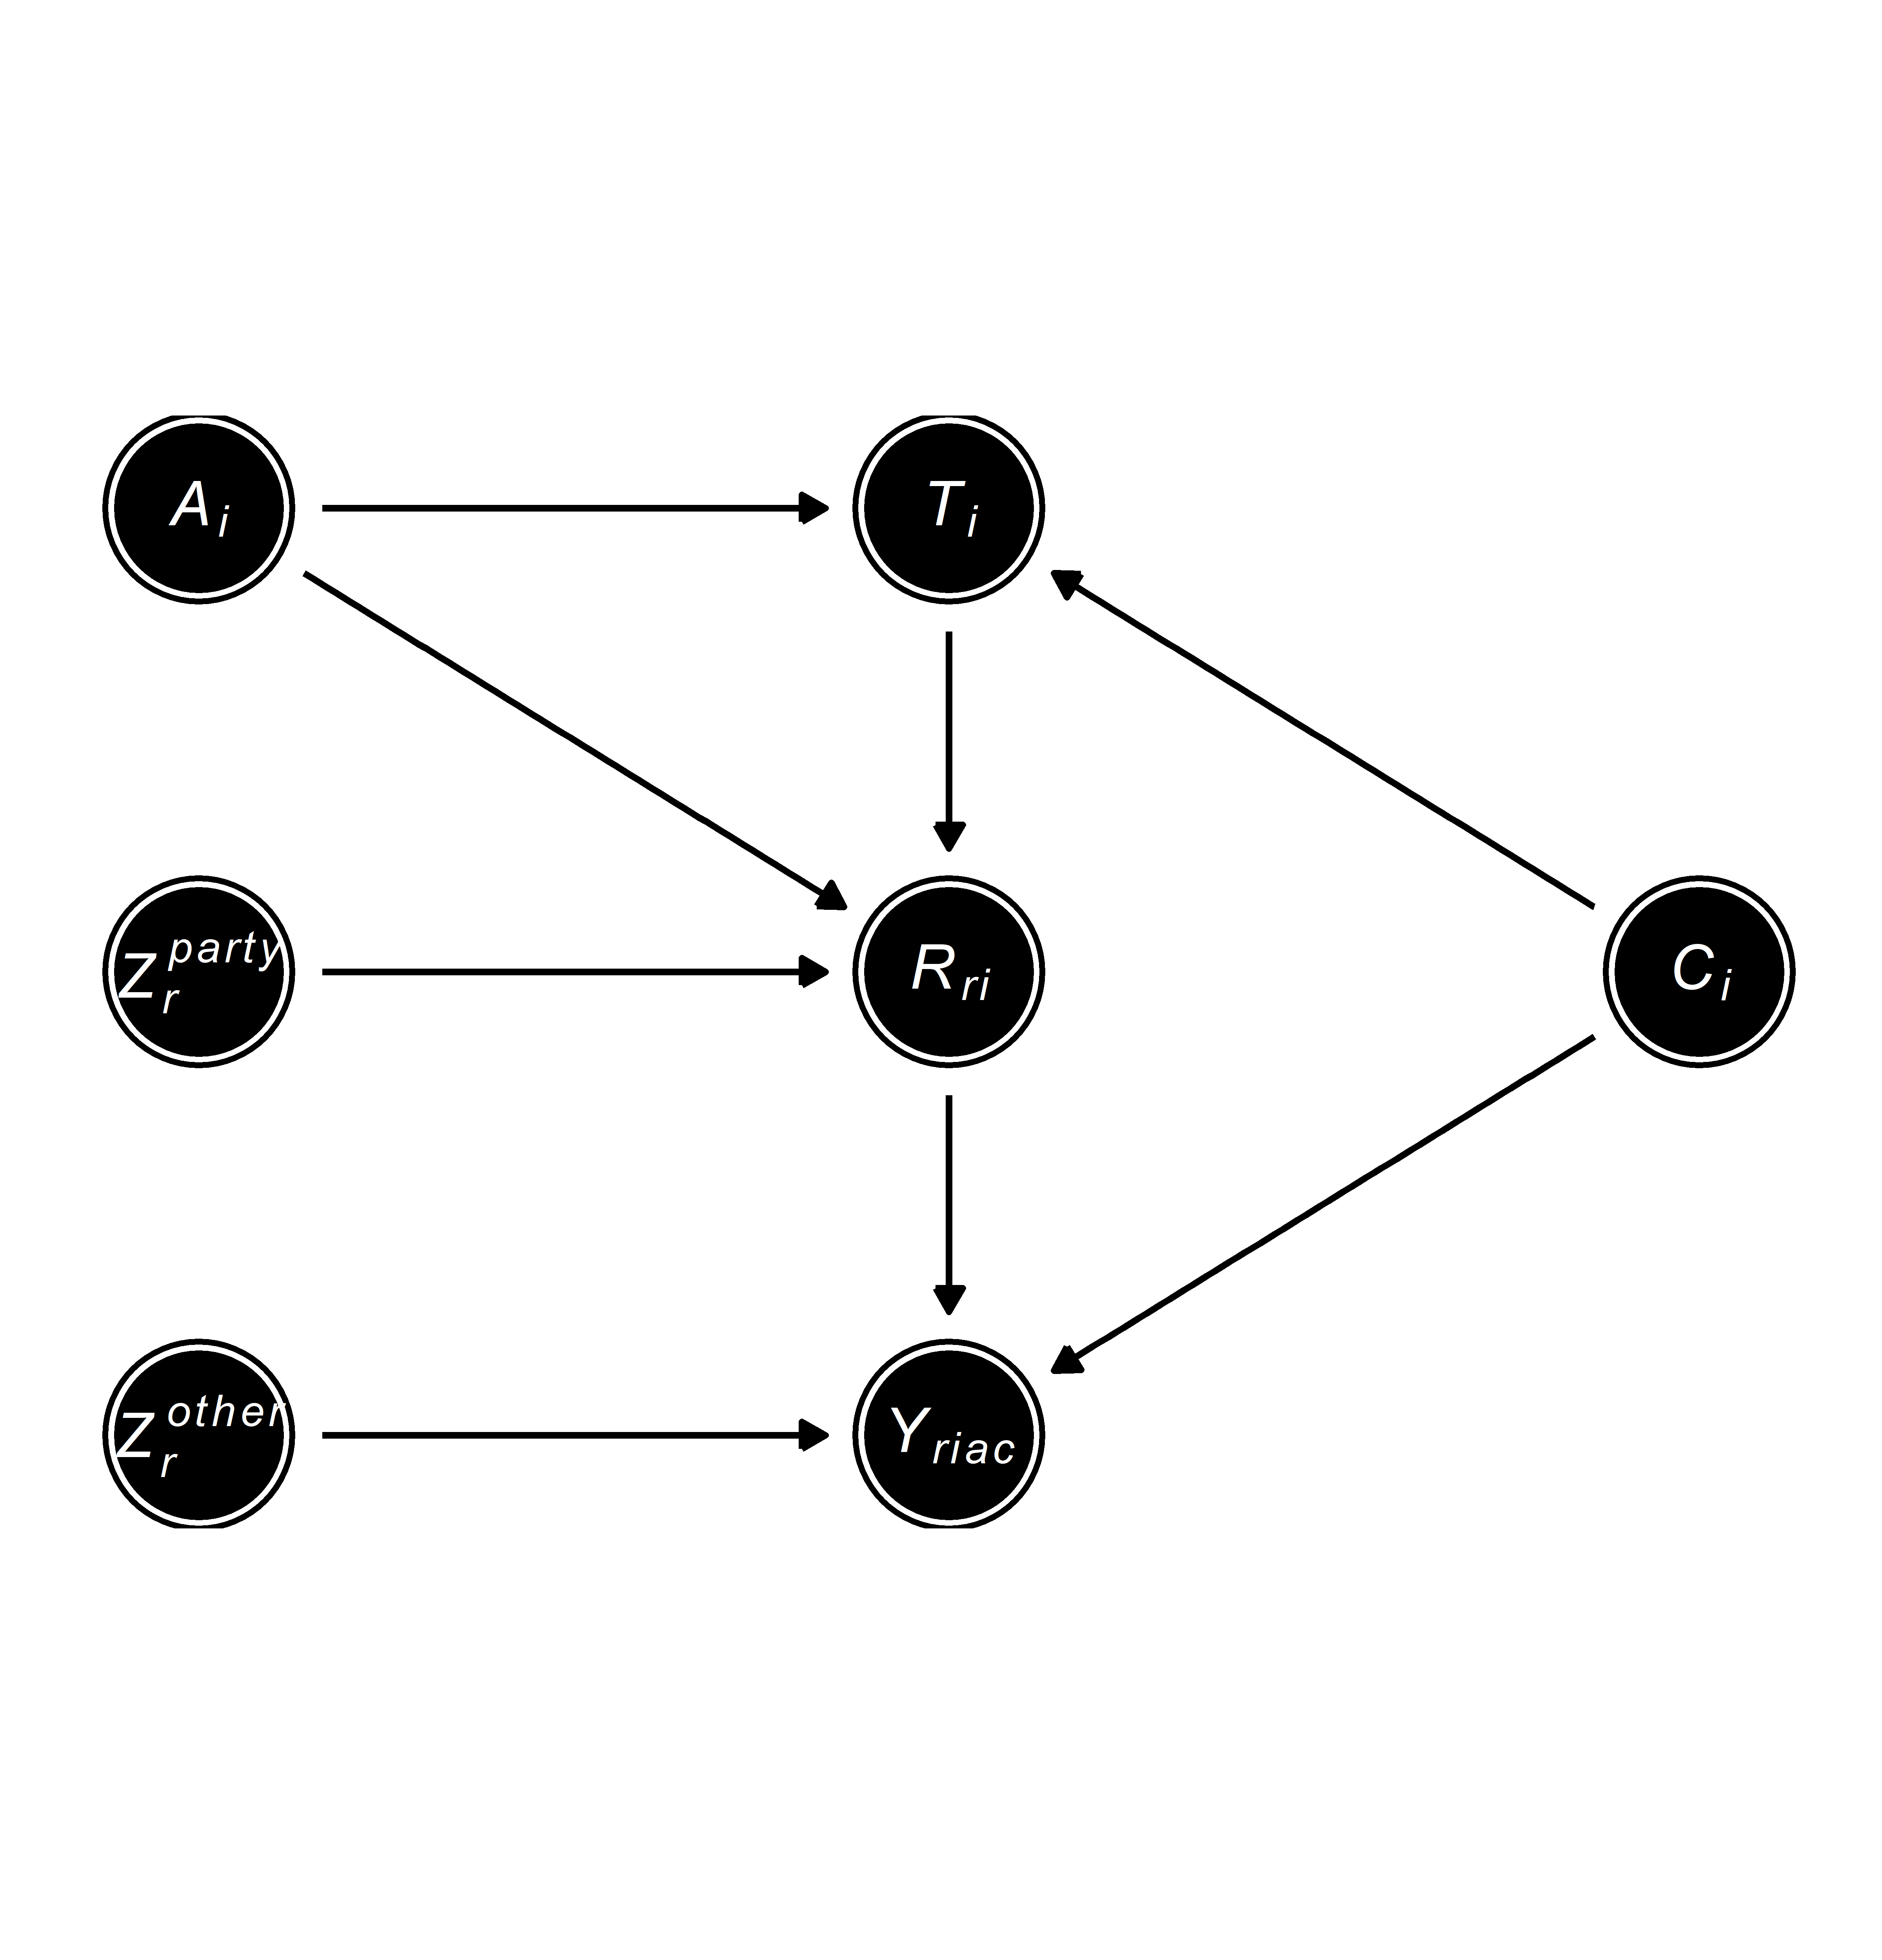

In [ ]:

dag <- dagitty(
  "dag {
\"Z1\" [pos=\"0, 1\"]
A [pos=\"0, 2\"]
C [pos=\"2, 1\"]
R [pos=\"1 ,1\"]
T [exposure,pos=\"1 , 2\"]
Y [outcome,pos=\"1 ,0\"]
Z [pos=\"0 ,0\"]
\"Z1\" -> R
A -> R
A -> T
C -> T
C -> Y
R -> Y
T -> R
Z -> Y
}"
)

tidy_dag <- tidy_dagitty(dag)

label_mapping <- tibble(
  name = c("A", "C", "R", "T", "Y", "Z", "Z1"),
  new_label = c(
    "italic(A[i])", # partisan anchor of respondent i
    "italic(C[i])", # respondent confounders
    "italic(R[ri])", # relationship (round r, respondent i)
    "italic(T[i])", # partisan type of respondent i
    "italic(Y[riac])", # tokens (r,i,a,c)
    "italic(Z[r]^{other})", # other randomized cues (round r)
    "italic(Z[r]^{party})" # party cue shown in round r
  )
)

tidy_dag <- tidy_dag |>
  left_join(
    label_mapping,
    by = join_by(name)
  )

ggdag(tidy_dag) +
  geom_dag_node() +
  geom_dag_text(aes(label = new_label), parse = T) +
  geom_dag_edges() +
  theme_dag() +
  theme(
    aspect.ratio = 1 / 1.618034
  )


# Model data

In [ ]:

df_modelvars <- eu25games2019 |>
  filter(
    der_conational == "co-national",
    !is.na(der_partisan_type)
  ) |>
  select(
    # outcome Y
    cj_token,
    # vars of interest
    der_partisan_type, # T
    der_partisan_relationship, # R
    # identifiers/hierarchical groupings
    meta_pid,
    der_partisan_anchor,
    meta_country,
    # game variables
    meta_game,
    meta_game_lab,
    # conjoint controls Z
    meta_round,
    meta_wave,
    cj_age_en,
    cj_reli_en,
    cj_class_en,
    cj_sex_en,
    cj_eupos_shown,
    # =========================================================================
    # COVARIATES (C) FOR CAUSAL ISOLATION
    # =========================================================================

    # --- BLOCK 1: Fundamental Political Identity and Ideology (Core Drivers of T & Y) ---
    q_lrpos2, # Left-Right ideological self-placement (Controls for core political position)
    q_eupos2, # EU integration position (Controls for major second dimension position)
    q_econ_nativism, # Attitudes towards economic nativism (Controls for key sociotropic threat perception)
    q_cult_nativism, # Attitudes towards cultural nativism (Controls for key sociotropic identity boundary)
    q_religion_en, # Respondent's religious affiliation (Controls for a major social cleavage/identity)

    # --- BLOCK 2: Anti-System & Populist Attitudes (CRUCIAL CONFOUNDERS for T) ---
    # These variables control for system-level dissatisfaction/cynicism that pushes
    # individuals to reject EXPLICIT partisan identity (T=0) while also driving Y.
    q_satis_demo_country, # Satisfaction with democracy in the country (System trust)
    q_understand_nat_pol, # Political efficacy (national level)
    q_nat_politicians_care, # Political responsiveness (national level)
    q_nat_public_say, # Political efficacy (national level)
    q_understand_eu_pol, # Political efficacy (EU level)
    q_eu_politicians_care, # Political responsiveness (EU level)
    q_eu_public_say, # Political efficacy (EU level)
    q_parties_harm, # Anti-party sentiment ("Parties do more harm than good")
    q_officials_talk_action, # Anti-elitism ("Officials talk too much")
    q_prefer_citizen_rep, # People-centrism ("Prefer citizens to politicians")
    q_people_make_decisions, # People-centrism ("People, not politicians, should decide")
    q_politicians_follow_people, # People-centrism ("Politicians must follow the people's will")
    q_politics_good_evil, # Manichaean worldview ("Politics is good vs. evil")
    q_people_unaware, # System cynicism ("People are unaware")
    q_leaders_educated, # Anti-populism (Elitism)
    q_expert_decisions, # Anti-populism (Expert governance)
    q_listen_other_groups, # Tolerance/Pluralism
    q_democracy_compromise, # Tolerance/Pluralism

    # --- BLOCK 3: Political Engagement & General Identity (Predictors of T and Y) ---
    q_attach_country, # Emotional attachment to one's country
    q_attach_eu, # Emotional attachment to the EU
    q_attach_eur, # Emotional attachment to Europe
    q_interest_pol_country, # Political engagement (national)
    q_interest_pol_eu, # Political engagement (EU)
    q_election_importance, # Political engagement (election importance)

    # --- BLOCK 4: Socioeconomic Status (SES) and Economic Context (Background Predictors) ---
    q_edu, # Education level
    q_perc_class, # Subjective social class
    q_eval_finance_household, # Micro-level economic evaluation
    q_eval_job, # Job/Employment evaluation
    q_eval_econ_country, # Macro-level economic evaluation (country)
    q_eval_econ_eur, # Macro-level economic evaluation (Europe)

    # --- BLOCK 5: Demographics and Fixed Traits (General Controls) ---
    q_gender, # Respondent's gender
    q_age, # Respondent's age
    q_rural_urban, # Residence setting
    q_risk_taking, # General propensity for risk-taking behavior
    q_future_discount # Patience/future discounting trait
  )


na_counts_modelvars1 <- df_modelvars |>
  # 1. Summarise: Calculate the sum of NAs for every column.
  summarise(across(
    .cols = everything(),
    .fns = ~ sum(is.na(.)),
    .names = "na_count_{.col}" # Temporarily rename columns for pivot
  )) |>

  # 2. Pivot: Convert the wide one-row summary into a tall, two-column table.
  pivot_longer(
    cols = everything(),
    names_to = "Variable",
    values_to = "NA_Count"
  ) |>

  # 3. Clean: Remove the temporary prefix for cleaner variable names.
  mutate(Variable = str_remove(Variable, "na_count_")) |>

  # 4. Arrange: Sort the result to see the variables with the most NAs first.
  arrange(desc(NA_Count))


# Remove variables with too many NAs (>10k)
df_modelvars <- df_modelvars |>
  select(
    -q_nat_politicians_care,
    -q_nat_public_say,
    -q_eu_politicians_care,
    -q_eu_public_say,
    -q_prefer_citizen_rep,
    -q_people_make_decisions,
    -q_politicians_follow_people,
    -q_attach_country,
    -q_attach_eu,
    -q_attach_eur,
    -q_election_importance
  )

# Recode dont know answers correctly
df_modelvars <- df_modelvars |>
  mutate(
    q_satis_demo_country = case_when(
      q_satis_demo_country == 5 | q_satis_demo_country == 6 ~ NA,
      .default = q_satis_demo_country
    ),
    q_perc_class = if_else(
      q_perc_class == 6,
      NA,
      q_perc_class
    ),
    q_eval_finance_household = if_else(
      q_eval_finance_household == 6,
      NA,
      q_eval_finance_household
    ),
    q_eval_job = if_else(
      q_eval_job == 6,
      NA,
      q_eval_job
    ),
    q_eval_econ_country = if_else(
      q_eval_econ_country == 6,
      NA,
      q_eval_econ_country
    ),
    q_eval_econ_eur = if_else(
      q_eval_econ_eur == 6,
      NA,
      q_eval_econ_eur
    ),
    q_rural_urban = if_else(
      q_rural_urban == 4,
      NA,
      q_rural_urban
    )
  )

# Categeorical to factors
df_modelvars <- df_modelvars |>
  mutate(
    # categorical to factors
    q_perc_class = factor(
      q_perc_class,
      levels = c(1, 2, 3, 4, 5),
      labels = c(
        "Working class",
        "Lower middle class",
        "Middle class",
        "Upper middle class",
        "Upper class"
      )
    ),
    q_rural_urban = factor(
      q_rural_urban,
      levels = c(1, 2, 3),
      labels = c(
        "Rural area or village",
        "Small or middle sized town",
        "Large town"
      )
    ),
    q_gender = factor(
      q_gender,
      levels = c(1, 2, 3),
      labels = c("Male", "Female", "Other")
    ),
    q_religion_en = as_factor(q_religion_en)
  )

# standardize survey scales
df_modelvars <- df_modelvars |>
  mutate(
    across(
      .cols = c(
        q_lrpos2,
        q_eupos2,
        q_econ_nativism,
        q_cult_nativism,
        q_satis_demo_country,
        q_understand_nat_pol,
        q_understand_eu_pol,
        q_parties_harm,
        q_officials_talk_action,
        q_politics_good_evil,
        q_people_unaware,
        q_leaders_educated,
        q_expert_decisions,
        q_listen_other_groups,
        q_democracy_compromise,
        q_interest_pol_country,
        q_interest_pol_eu,
        q_eval_finance_household,
        q_eval_job,
        q_eval_econ_country,
        q_eval_econ_eur,
        q_risk_taking,
        q_future_discount,
        q_edu,
        q_age
      ), # List all continuous variables to standardize
      .fns = ~ scale(.)[, 1], # Apply the scale() function
      .names = "{.col}_z" # Name the new standardized columns with a '_z' suffix
    )
  )

# Check again how missings have changed
na_counts_modelvars2 <- df_modelvars |>
  # 1. Summarise: Calculate the sum of NAs for every column.
  summarise(across(
    .cols = everything(),
    .fns = ~ sum(is.na(.)),
    .names = "na_count_{.col}" # Temporarily rename columns for pivot
  )) |>

  # 2. Pivot: Convert the wide one-row summary into a tall, two-column table.
  pivot_longer(
    cols = everything(),
    names_to = "Variable",
    values_to = "NA_Count"
  ) |>

  # 3. Clean: Remove the temporary prefix for cleaner variable names.
  mutate(Variable = str_remove(Variable, "na_count_")) |>

  # 4. Arrange: Sort the result to see the variables with the most NAs first.
  arrange(desc(NA_Count))

# Global variable mapping and final df for modelling
df_modelvars <- df_modelvars |>
  select(
    starts_with("cj_"),
    starts_with("der_"),
    starts_with("meta_"),
    ends_with("_z"),
    q_religion_en,
    q_perc_class,
    q_rural_urban,
    q_gender
  )

modelvars_labels <- c(
  "Token" = "cj_token",
  "Conj. Age" = "cj_age_en",
  "Conj. Religion" = "cj_reli_en",
  "Conj. Class" = "cj_class_en",
  "Conj. Gender" = "cj_sex_en",
  "Conj. EU" = "cj_eupos_shown",
  "Type" = "der_partisan_type",
  "Relationship" = "der_partisan_relationship",
  "Anchor" = "der_partisan_anchor",
  "Resp. ID" = "meta_pid",
  "Country" = "meta_country",
  "Game" = "meta_game_lab",
  "Round" = "meta_round",
  "Wave" = "meta_wave",
  "LR Pos" = "q_lrpos2_z",
  "EU Pos" = "q_eupos2_z",
  "Econ. Nativism" = "q_econ_nativism_z",
  "Cult. Nativism" = "q_cult_nativism_z",
  "Satis. Democ." = "q_satis_demo_country_z",
  "Understand Nat. Pol." = "q_understand_nat_pol_z",
  "Understand EU Pol." = "q_understand_eu_pol_z",
  "Parties Harm" = "q_parties_harm_z",
  "Officials Talk/Action" = "q_officials_talk_action_z",
  "Politics Good/Evil" = "q_politics_good_evil_z",
  "People Unaware" = "q_people_unaware_z",
  "Leaders Educated" = "q_leaders_educated_z",
  "Expert Decisions" = "q_expert_decisions_z",
  "Listen Other Groups" = "q_listen_other_groups_z",
  "Democ. Compromise" = "q_democracy_compromise_z",
  "Interest Nat. Pol." = "q_interest_pol_country_z",
  "Interest EU Pol." = "q_interest_pol_eu_z",
  "Eval. HH Finance" = "q_eval_finance_household_z",
  "Eval. Job" = "q_eval_job_z",
  "Eval. Nat. Econ." = "q_eval_econ_country_z",
  "Eval. Eur. Econ." = "q_eval_econ_eur_z",
  "Risk Taking" = "q_risk_taking_z",
  "Future Discount" = "q_future_discount_z",
  "Education (Z)" = "q_edu_z",
  "Age (Z)" = "q_age_z",
  "Religion" = "q_religion_en",
  "Perc. Class" = "q_perc_class",
  "Rural/Urban" = "q_rural_urban",
  "Gender" = "q_gender"
)


# Distribution of DV

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

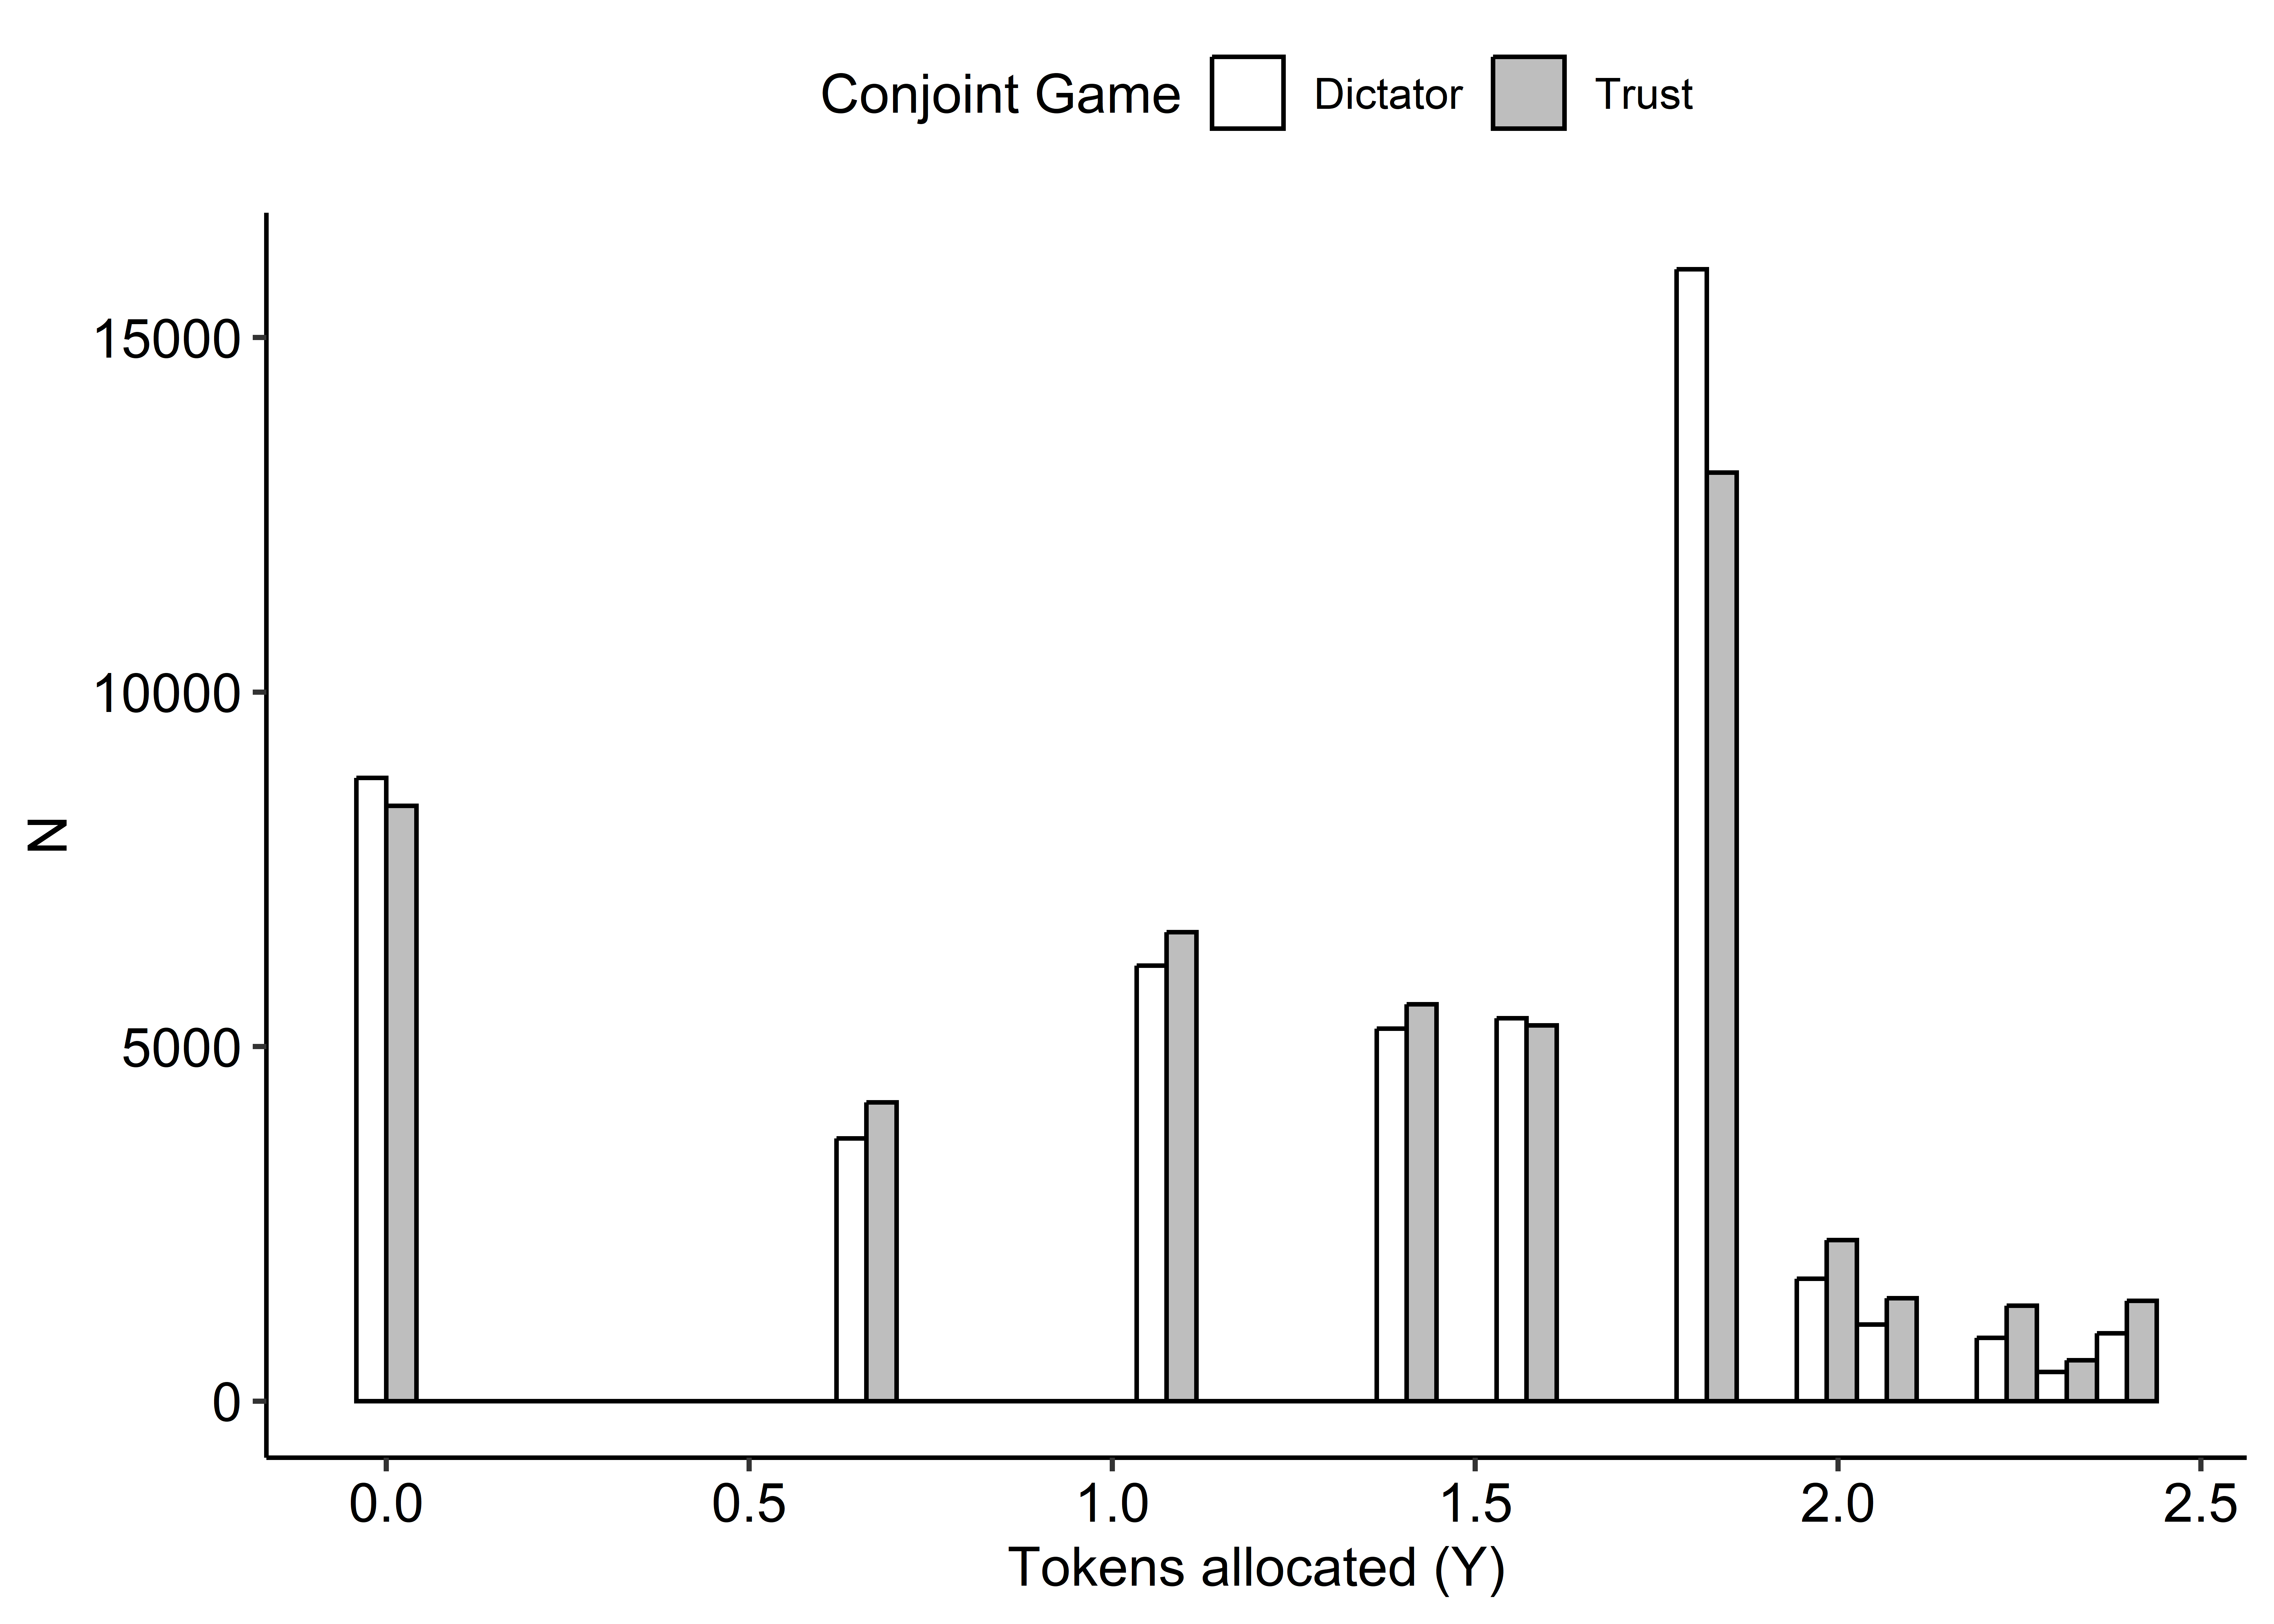

In [ ]:

summary_stats <- df_modelvars %>%
  group_by(meta_game_lab) %>%
  summarise(
    mean_token = mean(cj_token, na.rm = TRUE),
    median_token = median(cj_token, na.rm = TRUE),
    sd_token = sd(cj_token, na.rm = TRUE)
  )


df_modelvars |>
  select(cj_token, meta_game_lab) |>
  ggplot(
    aes(x = log(cj_token + 1), fill = meta_game_lab)
  ) +
  geom_histogram(
    position = position_dodge(),
    color = "black"
  ) +
  # scale_x_continuous(
  #   breaks = 0:10,
  #   labels = 0:10
  # ) +
  scale_fill_manual(
    values = c("white", "gray")
  ) +
  labs(
    x = "Tokens allocated (Y)",
    y = "N",
    fill = "Conjoint Game"
  ) +
  ggpubr::theme_pubr()


# Distribution of partisan type $T$ and relationship category $R$

In [ ]:

df_modelvars |>
  tabyl(der_partisan_type, der_partisan_relationship) |>
  gt()


# Covariate Distributions

In [ ]:

df_modelvars |>
  select(
    der_partisan_type,
    ends_with("_z"),
    q_religion_en,
    q_perc_class,
    q_rural_urban,
    q_gender
  ) |>
  tbl_summary(
    by = der_partisan_type,
    missing = "no",
    type = list(
      q_econ_nativism_z ~ "continuous",
      q_cult_nativism_z ~ "continuous",
      q_satis_demo_country_z ~ "continuous",
      q_understand_nat_pol_z ~ "continuous",
      q_understand_eu_pol_z ~ "continuous",
      q_parties_harm_z ~ "continuous",
      q_officials_talk_action_z ~ "continuous",
      q_politics_good_evil_z ~ "continuous",
      q_people_unaware_z ~ "continuous",
      q_leaders_educated_z ~ "continuous",
      q_expert_decisions_z ~ "continuous",
      q_listen_other_groups_z ~ "continuous",
      q_democracy_compromise_z ~ "continuous",
      q_interest_pol_country_z ~ "continuous",
      q_interest_pol_eu_z ~ "continuous",
      q_eval_finance_household_z ~ "continuous",
      q_eval_job_z ~ "continuous",
      q_eval_econ_country_z ~ "continuous",
      q_eval_econ_eur_z ~ "continuous",
      q_risk_taking_z ~ "continuous",
      q_future_discount_z ~ "continuous"
    )
  ) |>
  modify_header(label = "**Variable**") |>
  as_gt() |>
  tab_options(table.font.size = 10)


# Saving

In [ ]:

# save modeldata
save(
  df_modelvars,
  file = here("data", "02_processed", "df_modeldata.RData")
)


# Session Info

In [ ]:

session_info()


─ Session info ───────────────────────────────────────────────────────────────
 setting  value
 version  R version 4.5.1 (2025-06-13 ucrt)
 os       Windows 11 x64 (build 26200)
 system   x86_64, mingw32
 ui       RTerm
 language (EN)
 collate  English_United States.utf8
 ctype    English_United States.utf8
 tz       Europe/Berlin
 date     2026-01-09
 pandoc   3.6.3 @ c:\\Program Files\\Positron\\resources\\app\\quarto\\bin\\tools/ (via rmarkdown)
 quarto   1.7.32 @ C:\\PROGRA~1\\Positron\\RESOUR~1\\app\\quarto\\bin\\quarto.exe

─ Packages ───────────────────────────────────────────────────────────────────
 package      * version    date (UTC) lib source
 abind          1.4-8      2024-09-12 [1] CRAN (R 4.5.0)
 backports      1.5.0      2024-05-23 [1] CRAN (R 4.5.0)
 base64enc      0.1-3      2015-07-28 [1] CRAN (R 4.5.0)
 boot           1.3-31     2024-08-28 [2] CRAN (R 4.5.1)
 broom          1.0.9      2025-07-28 [1] CRAN (R 4.5.1)
 cachem         1.1.0      2024-05-16 [1] CRAN (R 4

# Render Time

In [ ]:

end_time <- Sys.time()

rendering_time <- end_time - start_time

message(paste(
  "Document rendered in:",
  round(as.numeric(rendering_time, units = "secs"), 2),
  "seconds.
"
))


Document rendered in: 16.07 seconds.

```` markdown
---
title: |
  CSAP Code Notebook 02
subtitle: |
  Exploratory Data Analyses
date: last-modified
date-format: MMMM D, YYYY
format:
  html:
    toc: true
    code-fold: true
    code-tools: true
    embed-resources: true
execute:
  echo: true
  warning: true
  eval: true
  message: true
---

# Setup

quarto-executable-code-5450563D

```r
#| label: setup

# To track render duration
start_time <- Sys.time()

# set width of console output
options(width = 80)


# Install and load required packages
p_required <- c(
  "tidyverse",
  "here",
  "janitor",
  "dagitty",
  "ggdag",
  "ggpubr",
  "gtsummary",
  "gt",
  "sessioninfo"
)
packages <- rownames(installed.packages())
p_to_install <- p_required[!(p_required %in% packages)]
if (length(p_to_install) > 0) {
  install.packages(p_to_install)
}
sapply(p_required, require, character.only = TRUE)
rm(p_required, p_to_install, packages)
```

quarto-executable-code-5450563D

```r
#| label: load-data

load(
  here(
    "data",
    "02_processed",
    "eu25games2019.RData"
  )
)
```

# Table respondents by country

quarto-executable-code-5450563D

```r
#| label: tbl-nresp-country
#| tbl-cap: "Sample composition by country. Numbers denote respondents."

eu25games2019 |>
  distinct(meta_pid, .keep_all = T) |>
  tabyl(
    meta_country
  ) |>
  adorn_rounding(2) |>
  adorn_totals() |>
  knitr::kable(col.names = c("Country", "N", "Percent"))
```

# Table respondents by country and gender

quarto-executable-code-5450563D

```r
#| label: tbl-nresp-country-gender
#| tbl-cap: "Sample composition by country and gender. Numbers denote respondents."

eu25games2019 |>
  distinct(meta_pid, .keep_all = T) |>
  tabyl(
    meta_country,
    q_gender
  ) |>
  adorn_totals() |>
  knitr::kable(
    col.names = c("Country", "Male", "Female", "Other")
  )
```

# Table respondents by country and age group

quarto-executable-code-5450563D

```r
#| label: tbl-nresp-country-agegroup
#| tbl-cap: "Sample composition by country and age group. Numbers denote respondents."

eu25games2019 |>
  distinct(meta_pid, .keep_all = TRUE) |>
  group_by(meta_country) |>
  summarise(
    `18-25` = sum(q_age >= 18 & q_age <= 25, na.rm = T),
    `26-35` = sum(q_age >= 26 & q_age <= 35, na.rm = T),
    `36-45` = sum(q_age >= 36 & q_age <= 45, na.rm = T),
    `46-55` = sum(q_age >= 46 & q_age <= 55, na.rm = T),
    `56-65` = sum(q_age >= 56 & q_age <= 65, na.rm = T),
    `66-75` = sum(q_age >= 66 & q_age <= 75, na.rm = T),
    `>76` = sum(q_age >= 76, na.rm = T)
  ) |>
  adorn_totals() |>
  knitr::kable(
    col.names = c(
      "Country",
      "18 to 25",
      "26 to 35",
      "36 to 45",
      "46 to 55",
      "56 to 65",
      "66 to 75",
      "> 75"
    )
  )

```

# Model DAG

quarto-executable-code-5450563D

```r
#| label: fig-dag
#| fig-cap: "Directed acyclic graph of the causal data-generating process. Respondents have a partisan anchor $A_i$, representing the party they feel attached to (explicit partisans) or intend to vote for (implicit partisans). Partisan type $T_i$ (explicit vs. implicit) is only defined for respondents with a partisan anchor and is therefore a child node of $A_i$. Each conjoint profile shown in round $r$ presents randomized attributes: a partisan cue $Z^{party}_r$ and other attributes $Z^{other}_r$. The partisan-relationship variable $R_{ri} = f(A_i, Z^{party}_r)$ determines whether the profile is interpreted as a co-partisan, out-partisan, or neutral for respondent $i$. Token allocations $Y_{riac}$ are affected by both $R_{ri}$ and $Z^{other}_r$, with the effect of $R_{ri}$ theorized to depend on $T_i$. Because $T_i$ is observational, $C_i$ denotes potential confounders of both $T_i$ and $Y_{ri}$, highlighting the assumptions required for causal interpretation."
#| fig-dpi: 500
#| fig-width: 4.8

dag <- dagitty(
  "dag {
\"Z1\" [pos=\"0, 1\"]
A [pos=\"0, 2\"]
C [pos=\"2, 1\"]
R [pos=\"1 ,1\"]
T [exposure,pos=\"1 , 2\"]
Y [outcome,pos=\"1 ,0\"]
Z [pos=\"0 ,0\"]
\"Z1\" -> R
A -> R
A -> T
C -> T
C -> Y
R -> Y
T -> R
Z -> Y
}"
)

tidy_dag <- tidy_dagitty(dag)

label_mapping <- tibble(
  name = c("A", "C", "R", "T", "Y", "Z", "Z1"),
  new_label = c(
    "italic(A[i])", # partisan anchor of respondent i
    "italic(C[i])", # respondent confounders
    "italic(R[ri])", # relationship (round r, respondent i)
    "italic(T[i])", # partisan type of respondent i
    "italic(Y[riac])", # tokens (r,i,a,c)
    "italic(Z[r]^{other})", # other randomized cues (round r)
    "italic(Z[r]^{party})" # party cue shown in round r
  )
)

tidy_dag <- tidy_dag |>
  left_join(
    label_mapping,
    by = join_by(name)
  )

ggdag(tidy_dag) +
  geom_dag_node() +
  geom_dag_text(aes(label = new_label), parse = T) +
  geom_dag_edges() +
  theme_dag() +
  theme(
    aspect.ratio = 1 / 1.618034
  )
```

# Model data

quarto-executable-code-5450563D

```r
#| label: model-data

df_modelvars <- eu25games2019 |>
  filter(
    der_conational == "co-national",
    !is.na(der_partisan_type)
  ) |>
  select(
    # outcome Y
    cj_token,
    # vars of interest
    der_partisan_type, # T
    der_partisan_relationship, # R
    # identifiers/hierarchical groupings
    meta_pid,
    der_partisan_anchor,
    meta_country,
    # game variables
    meta_game,
    meta_game_lab,
    # conjoint controls Z
    meta_round,
    meta_wave,
    cj_age_en,
    cj_reli_en,
    cj_class_en,
    cj_sex_en,
    cj_eupos_shown,
    # =========================================================================
    # COVARIATES (C) FOR CAUSAL ISOLATION
    # =========================================================================

    # --- BLOCK 1: Fundamental Political Identity and Ideology (Core Drivers of T & Y) ---
    q_lrpos2, # Left-Right ideological self-placement (Controls for core political position)
    q_eupos2, # EU integration position (Controls for major second dimension position)
    q_econ_nativism, # Attitudes towards economic nativism (Controls for key sociotropic threat perception)
    q_cult_nativism, # Attitudes towards cultural nativism (Controls for key sociotropic identity boundary)
    q_religion_en, # Respondent's religious affiliation (Controls for a major social cleavage/identity)

    # --- BLOCK 2: Anti-System & Populist Attitudes (CRUCIAL CONFOUNDERS for T) ---
    # These variables control for system-level dissatisfaction/cynicism that pushes
    # individuals to reject EXPLICIT partisan identity (T=0) while also driving Y.
    q_satis_demo_country, # Satisfaction with democracy in the country (System trust)
    q_understand_nat_pol, # Political efficacy (national level)
    q_nat_politicians_care, # Political responsiveness (national level)
    q_nat_public_say, # Political efficacy (national level)
    q_understand_eu_pol, # Political efficacy (EU level)
    q_eu_politicians_care, # Political responsiveness (EU level)
    q_eu_public_say, # Political efficacy (EU level)
    q_parties_harm, # Anti-party sentiment ("Parties do more harm than good")
    q_officials_talk_action, # Anti-elitism ("Officials talk too much")
    q_prefer_citizen_rep, # People-centrism ("Prefer citizens to politicians")
    q_people_make_decisions, # People-centrism ("People, not politicians, should decide")
    q_politicians_follow_people, # People-centrism ("Politicians must follow the people's will")
    q_politics_good_evil, # Manichaean worldview ("Politics is good vs. evil")
    q_people_unaware, # System cynicism ("People are unaware")
    q_leaders_educated, # Anti-populism (Elitism)
    q_expert_decisions, # Anti-populism (Expert governance)
    q_listen_other_groups, # Tolerance/Pluralism
    q_democracy_compromise, # Tolerance/Pluralism

    # --- BLOCK 3: Political Engagement & General Identity (Predictors of T and Y) ---
    q_attach_country, # Emotional attachment to one's country
    q_attach_eu, # Emotional attachment to the EU
    q_attach_eur, # Emotional attachment to Europe
    q_interest_pol_country, # Political engagement (national)
    q_interest_pol_eu, # Political engagement (EU)
    q_election_importance, # Political engagement (election importance)

    # --- BLOCK 4: Socioeconomic Status (SES) and Economic Context (Background Predictors) ---
    q_edu, # Education level
    q_perc_class, # Subjective social class
    q_eval_finance_household, # Micro-level economic evaluation
    q_eval_job, # Job/Employment evaluation
    q_eval_econ_country, # Macro-level economic evaluation (country)
    q_eval_econ_eur, # Macro-level economic evaluation (Europe)

    # --- BLOCK 5: Demographics and Fixed Traits (General Controls) ---
    q_gender, # Respondent's gender
    q_age, # Respondent's age
    q_rural_urban, # Residence setting
    q_risk_taking, # General propensity for risk-taking behavior
    q_future_discount # Patience/future discounting trait
  )


na_counts_modelvars1 <- df_modelvars |>
  # 1. Summarise: Calculate the sum of NAs for every column.
  summarise(across(
    .cols = everything(),
    .fns = ~ sum(is.na(.)),
    .names = "na_count_{.col}" # Temporarily rename columns for pivot
  )) |>

  # 2. Pivot: Convert the wide one-row summary into a tall, two-column table.
  pivot_longer(
    cols = everything(),
    names_to = "Variable",
    values_to = "NA_Count"
  ) |>

  # 3. Clean: Remove the temporary prefix for cleaner variable names.
  mutate(Variable = str_remove(Variable, "na_count_")) |>

  # 4. Arrange: Sort the result to see the variables with the most NAs first.
  arrange(desc(NA_Count))


# Remove variables with too many NAs (>10k)
df_modelvars <- df_modelvars |>
  select(
    -q_nat_politicians_care,
    -q_nat_public_say,
    -q_eu_politicians_care,
    -q_eu_public_say,
    -q_prefer_citizen_rep,
    -q_people_make_decisions,
    -q_politicians_follow_people,
    -q_attach_country,
    -q_attach_eu,
    -q_attach_eur,
    -q_election_importance
  )

# Recode dont know answers correctly
df_modelvars <- df_modelvars |>
  mutate(
    q_satis_demo_country = case_when(
      q_satis_demo_country == 5 | q_satis_demo_country == 6 ~ NA,
      .default = q_satis_demo_country
    ),
    q_perc_class = if_else(
      q_perc_class == 6,
      NA,
      q_perc_class
    ),
    q_eval_finance_household = if_else(
      q_eval_finance_household == 6,
      NA,
      q_eval_finance_household
    ),
    q_eval_job = if_else(
      q_eval_job == 6,
      NA,
      q_eval_job
    ),
    q_eval_econ_country = if_else(
      q_eval_econ_country == 6,
      NA,
      q_eval_econ_country
    ),
    q_eval_econ_eur = if_else(
      q_eval_econ_eur == 6,
      NA,
      q_eval_econ_eur
    ),
    q_rural_urban = if_else(
      q_rural_urban == 4,
      NA,
      q_rural_urban
    )
  )

# Categeorical to factors
df_modelvars <- df_modelvars |>
  mutate(
    # categorical to factors
    q_perc_class = factor(
      q_perc_class,
      levels = c(1, 2, 3, 4, 5),
      labels = c(
        "Working class",
        "Lower middle class",
        "Middle class",
        "Upper middle class",
        "Upper class"
      )
    ),
    q_rural_urban = factor(
      q_rural_urban,
      levels = c(1, 2, 3),
      labels = c(
        "Rural area or village",
        "Small or middle sized town",
        "Large town"
      )
    ),
    q_gender = factor(
      q_gender,
      levels = c(1, 2, 3),
      labels = c("Male", "Female", "Other")
    ),
    q_religion_en = as_factor(q_religion_en)
  )

# standardize survey scales
df_modelvars <- df_modelvars |>
  mutate(
    across(
      .cols = c(
        q_lrpos2,
        q_eupos2,
        q_econ_nativism,
        q_cult_nativism,
        q_satis_demo_country,
        q_understand_nat_pol,
        q_understand_eu_pol,
        q_parties_harm,
        q_officials_talk_action,
        q_politics_good_evil,
        q_people_unaware,
        q_leaders_educated,
        q_expert_decisions,
        q_listen_other_groups,
        q_democracy_compromise,
        q_interest_pol_country,
        q_interest_pol_eu,
        q_eval_finance_household,
        q_eval_job,
        q_eval_econ_country,
        q_eval_econ_eur,
        q_risk_taking,
        q_future_discount,
        q_edu,
        q_age
      ), # List all continuous variables to standardize
      .fns = ~ scale(.)[, 1], # Apply the scale() function
      .names = "{.col}_z" # Name the new standardized columns with a '_z' suffix
    )
  )

# Check again how missings have changed
na_counts_modelvars2 <- df_modelvars |>
  # 1. Summarise: Calculate the sum of NAs for every column.
  summarise(across(
    .cols = everything(),
    .fns = ~ sum(is.na(.)),
    .names = "na_count_{.col}" # Temporarily rename columns for pivot
  )) |>

  # 2. Pivot: Convert the wide one-row summary into a tall, two-column table.
  pivot_longer(
    cols = everything(),
    names_to = "Variable",
    values_to = "NA_Count"
  ) |>

  # 3. Clean: Remove the temporary prefix for cleaner variable names.
  mutate(Variable = str_remove(Variable, "na_count_")) |>

  # 4. Arrange: Sort the result to see the variables with the most NAs first.
  arrange(desc(NA_Count))

# Global variable mapping and final df for modelling
df_modelvars <- df_modelvars |>
  select(
    starts_with("cj_"),
    starts_with("der_"),
    starts_with("meta_"),
    ends_with("_z"),
    q_religion_en,
    q_perc_class,
    q_rural_urban,
    q_gender
  )

modelvars_labels <- c(
  "Token" = "cj_token",
  "Conj. Age" = "cj_age_en",
  "Conj. Religion" = "cj_reli_en",
  "Conj. Class" = "cj_class_en",
  "Conj. Gender" = "cj_sex_en",
  "Conj. EU" = "cj_eupos_shown",
  "Type" = "der_partisan_type",
  "Relationship" = "der_partisan_relationship",
  "Anchor" = "der_partisan_anchor",
  "Resp. ID" = "meta_pid",
  "Country" = "meta_country",
  "Game" = "meta_game_lab",
  "Round" = "meta_round",
  "Wave" = "meta_wave",
  "LR Pos" = "q_lrpos2_z",
  "EU Pos" = "q_eupos2_z",
  "Econ. Nativism" = "q_econ_nativism_z",
  "Cult. Nativism" = "q_cult_nativism_z",
  "Satis. Democ." = "q_satis_demo_country_z",
  "Understand Nat. Pol." = "q_understand_nat_pol_z",
  "Understand EU Pol." = "q_understand_eu_pol_z",
  "Parties Harm" = "q_parties_harm_z",
  "Officials Talk/Action" = "q_officials_talk_action_z",
  "Politics Good/Evil" = "q_politics_good_evil_z",
  "People Unaware" = "q_people_unaware_z",
  "Leaders Educated" = "q_leaders_educated_z",
  "Expert Decisions" = "q_expert_decisions_z",
  "Listen Other Groups" = "q_listen_other_groups_z",
  "Democ. Compromise" = "q_democracy_compromise_z",
  "Interest Nat. Pol." = "q_interest_pol_country_z",
  "Interest EU Pol." = "q_interest_pol_eu_z",
  "Eval. HH Finance" = "q_eval_finance_household_z",
  "Eval. Job" = "q_eval_job_z",
  "Eval. Nat. Econ." = "q_eval_econ_country_z",
  "Eval. Eur. Econ." = "q_eval_econ_eur_z",
  "Risk Taking" = "q_risk_taking_z",
  "Future Discount" = "q_future_discount_z",
  "Education (Z)" = "q_edu_z",
  "Age (Z)" = "q_age_z",
  "Religion" = "q_religion_en",
  "Perc. Class" = "q_perc_class",
  "Rural/Urban" = "q_rural_urban",
  "Gender" = "q_gender"
)

```

# Distribution of DV

quarto-executable-code-5450563D

```r
#| label: fig-distr-y
#| fig-dpi: 500
#| fig-cap: "Distribution of token allocation (Y) by game. Dictator game: $Mean = 3.41$, $median = 4$, $SD = 2.35$. Trust game: $Mean = 3.48$, $median = 4$, $SD = 2.49$"
#| fig-pos: H

summary_stats <- df_modelvars %>%
  group_by(meta_game_lab) %>%
  summarise(
    mean_token = mean(cj_token, na.rm = TRUE),
    median_token = median(cj_token, na.rm = TRUE),
    sd_token = sd(cj_token, na.rm = TRUE)
  )


df_modelvars |>
  select(cj_token, meta_game_lab) |>
  ggplot(
    aes(x = log(cj_token + 1), fill = meta_game_lab)
  ) +
  geom_histogram(
    position = position_dodge(),
    color = "black"
  ) +
  # scale_x_continuous(
  #   breaks = 0:10,
  #   labels = 0:10
  # ) +
  scale_fill_manual(
    values = c("white", "gray")
  ) +
  labs(
    x = "Tokens allocated (Y)",
    y = "N",
    fill = "Conjoint Game"
  ) +
  ggpubr::theme_pubr()

```

# Distribution of partisan type $T$ and relationship category $R$

quarto-executable-code-5450563D

```r
#| label: tbl-t-r-distr

df_modelvars |>
  tabyl(der_partisan_type, der_partisan_relationship) |>
  gt()
```

# Covariate Distributions

quarto-executable-code-5450563D

```r
#| label: tbl-covariate-distr

df_modelvars |>
  select(
    der_partisan_type,
    ends_with("_z"),
    q_religion_en,
    q_perc_class,
    q_rural_urban,
    q_gender
  ) |>
  tbl_summary(
    by = der_partisan_type,
    missing = "no",
    type = list(
      q_econ_nativism_z ~ "continuous",
      q_cult_nativism_z ~ "continuous",
      q_satis_demo_country_z ~ "continuous",
      q_understand_nat_pol_z ~ "continuous",
      q_understand_eu_pol_z ~ "continuous",
      q_parties_harm_z ~ "continuous",
      q_officials_talk_action_z ~ "continuous",
      q_politics_good_evil_z ~ "continuous",
      q_people_unaware_z ~ "continuous",
      q_leaders_educated_z ~ "continuous",
      q_expert_decisions_z ~ "continuous",
      q_listen_other_groups_z ~ "continuous",
      q_democracy_compromise_z ~ "continuous",
      q_interest_pol_country_z ~ "continuous",
      q_interest_pol_eu_z ~ "continuous",
      q_eval_finance_household_z ~ "continuous",
      q_eval_job_z ~ "continuous",
      q_eval_econ_country_z ~ "continuous",
      q_eval_econ_eur_z ~ "continuous",
      q_risk_taking_z ~ "continuous",
      q_future_discount_z ~ "continuous"
    )
  ) |>
  modify_header(label = "**Variable**") |>
  as_gt() |>
  tab_options(table.font.size = 10)

```


# Saving

```{r, message = NA}
#| label: save-data4model

# save modeldata
save(
  df_modelvars,
  file = here("data", "02_processed", "df_modeldata.RData")
)
```

# Session Info

quarto-executable-code-5450563D

```r
#| label: session-info

session_info()
```


# Render Time

quarto-executable-code-5450563D

```r
#| label: render-time

end_time <- Sys.time()

rendering_time <- end_time - start_time

message(paste(
  "Document rendered in:",
  round(as.numeric(rendering_time, units = "secs"), 2),
  "seconds.
"
))
```


  
````